In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing and reading dataset
df = pd.read_csv('/content/dataset.csv')
df.head()

,Price_type,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30
0,H,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,H,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,H,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,H,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,H,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# to know the columns
df.columns

Index(['Price_type', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9',
       'v10', 'v11', 'v13', 'v14', 'v15', 'v16', 'v18', 'v19', 'v20', 'v21',
       'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v30'],
      dtype='object')

In [4]:
df.shape

(569, 29)

In [5]:
## gives information about the data types,columns, null value counts, memory usage etc
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price_type  569 non-null    object 
 1   v1          569 non-null    float64
 2   v2          569 non-null    float64
 3   v3          569 non-null    float64
 4   v4          569 non-null    float64
 5   v5          569 non-null    float64
 6   v6          569 non-null    float64
 7   v7          569 non-null    float64
 8   v8          569 non-null    float64
 9   v9          569 non-null    float64
 10  v10         569 non-null    float64
 11  v11         569 non-null    float64
 12  v13         569 non-null    float64
 13  v14         569 non-null    float64
 14  v15         569 non-null    float64
 15  v16         569 non-null    float64
 16  v18         569 non-null    float64
 17  v19         569 non-null    float64
 18  v20         569 non-null    float64
 19  v21         569 non-null    f

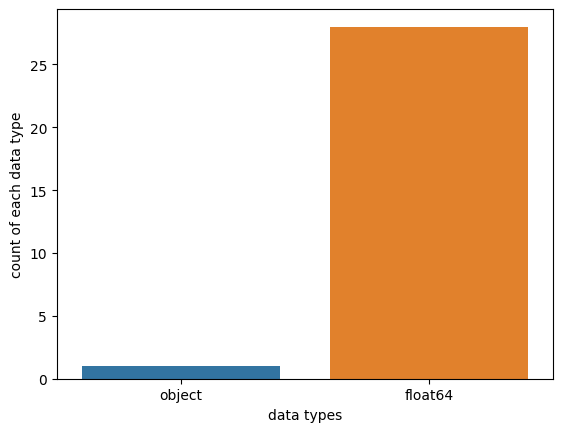

In [6]:
sns.countplot(x=df.dtypes ,data=df)
plt.xlabel("data types")
plt.ylabel("count of each data type")
plt.show()

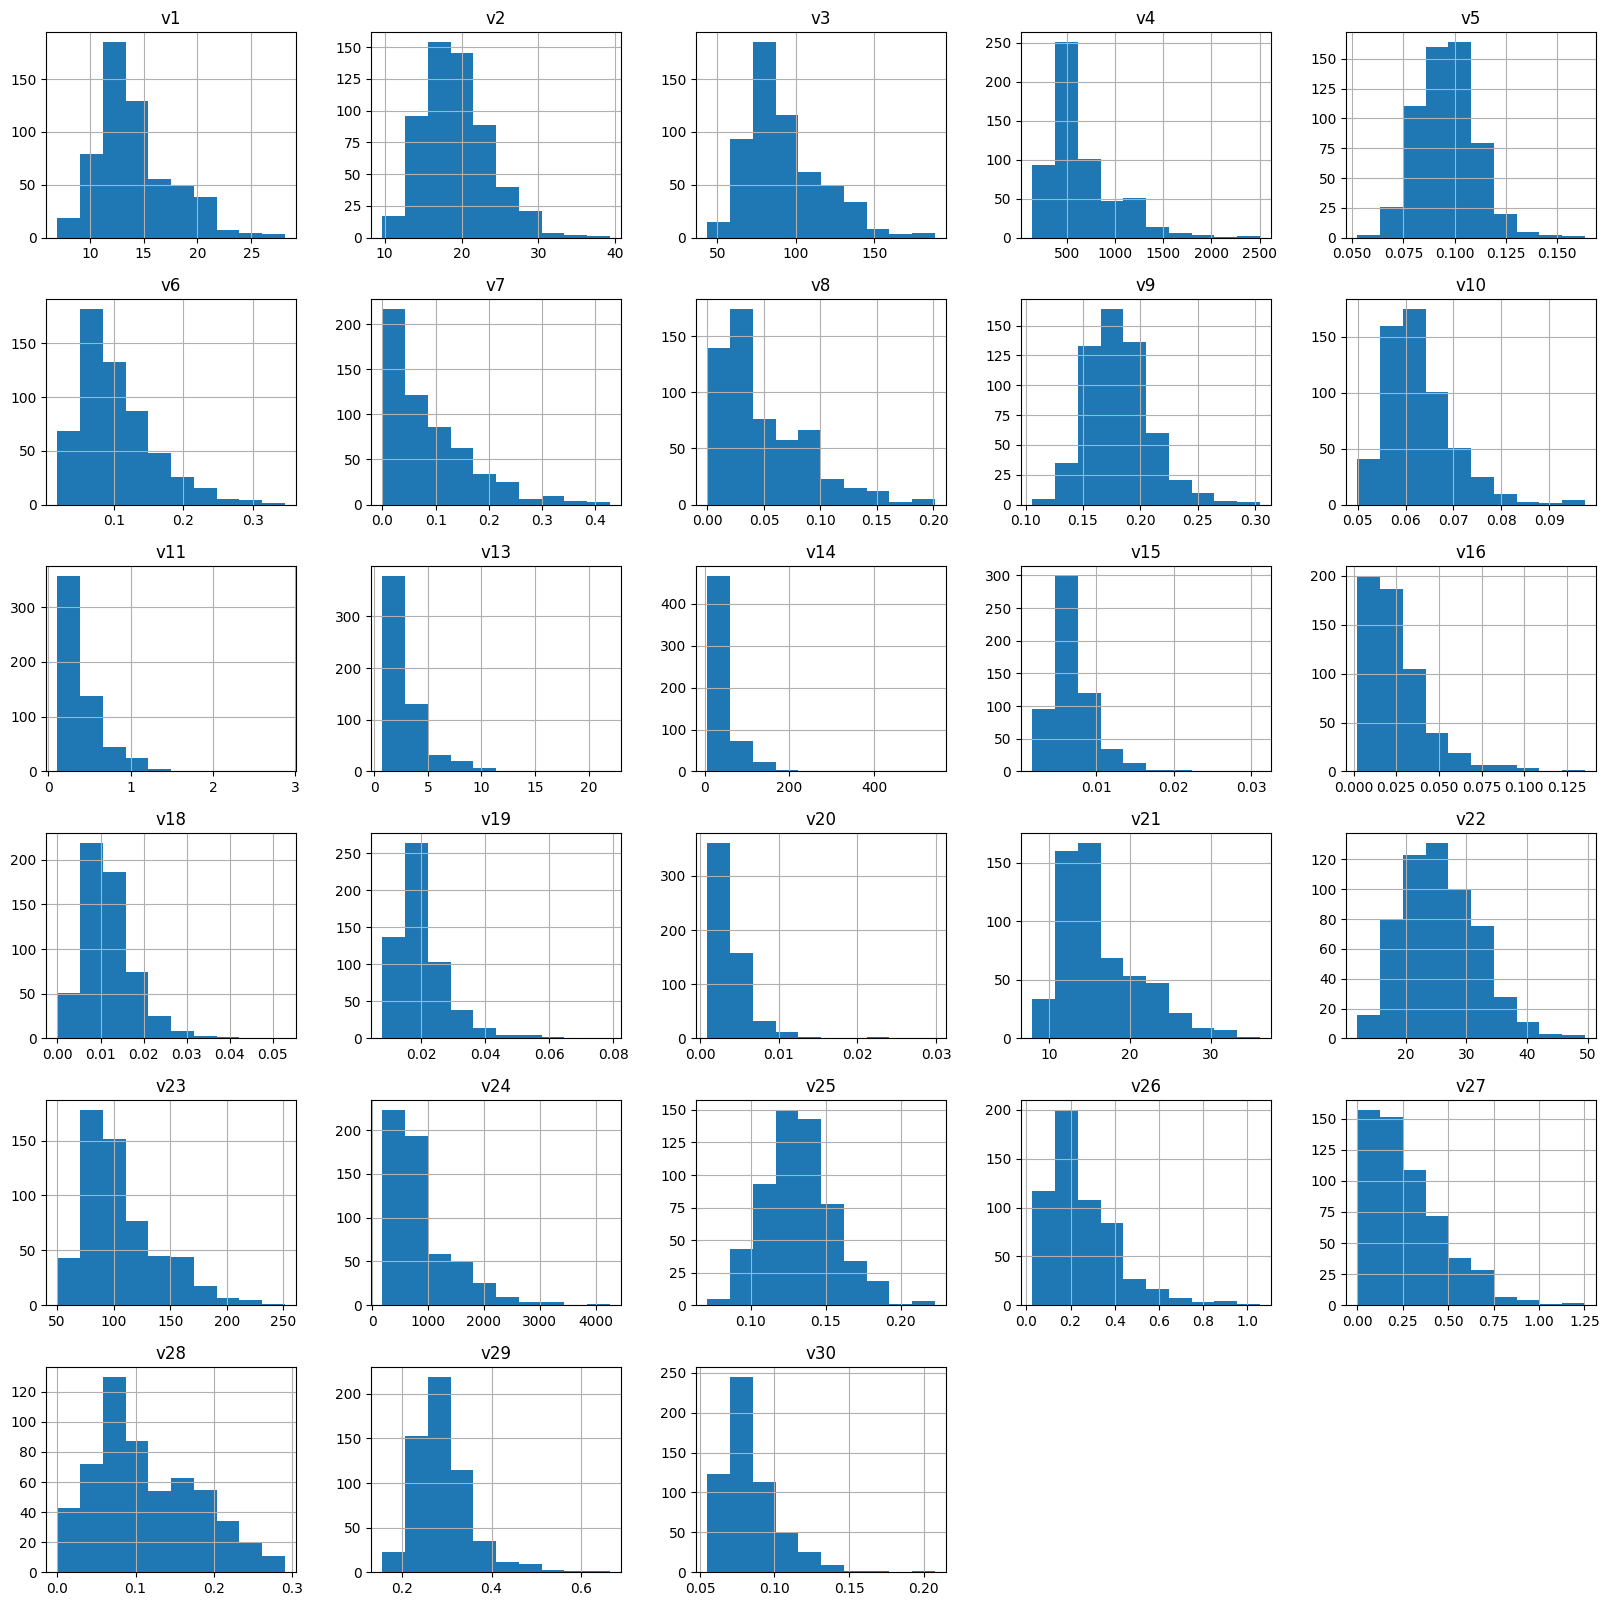

In [7]:
p = df.hist(figsize = (20,20))

In [8]:
df.isnull().sum()

Price_type    0
v1            0
v2            0
v3            0
v4            0
v5            0
v6            0
v7            0
v8            0
v9            0
v10           0
v11           0
v13           0
v14           0
v15           0
v16           0
v18           0
v19           0
v20           0
v21           0
v22           0
v23           0
v24           0
v25           0
v26           0
v27           0
v28           0
v29           0
v30           0
dtype: int64

<ipython-input-9-ad9c1f858224>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  p=sns.heatmap(df.corr(),cmap ='RdYlGn')


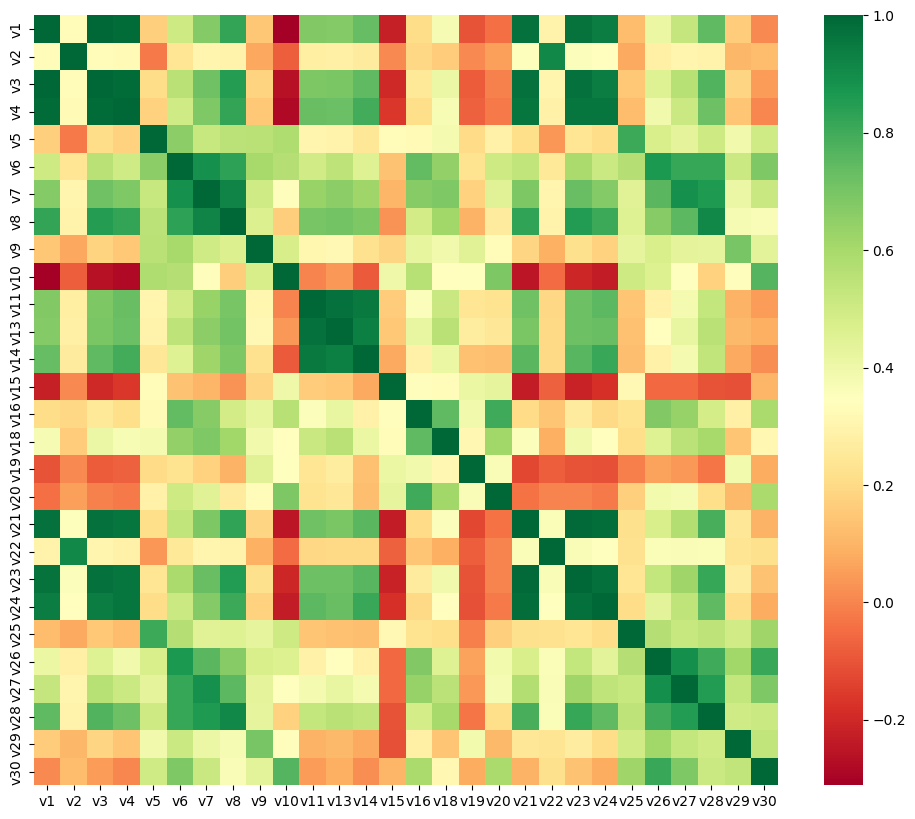

In [9]:
plt.figure(figsize=(12,10))  
p=sns.heatmap(df.corr(),cmap ='RdYlGn')

In [10]:
#defining dependent and independent variable
x= df.drop(['Price_type'],axis=1)
y = df['Price_type']

In [11]:
#Splitting the dataset into training and tescting set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((398, 28), (171, 28), (398,), (171,))

In [12]:
#Standard Scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [13]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)


In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train,y_train)
y_pred= knn.predict(x_test)
y_pred[0:5]

array(['H', 'L', 'L', 'L', 'L'], dtype=object)

In [17]:
#Test Model accuracy
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test , y_pred)
print("Accuracy", acc*100, "%")

Accuracy 95.90643274853801 %


In [18]:
#Train Model accuracy
y_predTrain = knn.predict(x_train)
y_predTrain[0:5]
accuracy_score(y_train , y_predTrain)

0.9673366834170855

<Axes: >

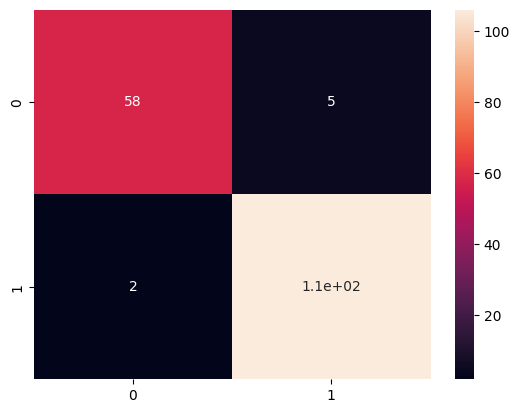

In [19]:
from sklearn.metrics import confusion_matrix , classification_report
sns.heatmap(confusion_matrix(y_test , y_pred),annot = True)

In [20]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           H       0.97      0.92      0.94        63
           L       0.95      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [21]:
from sklearn.model_selection import cross_val_score
k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(x)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, x, y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

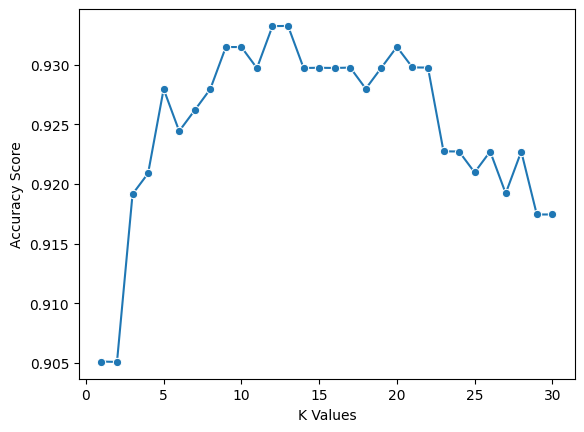

In [22]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

# **After LDA**

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)

In [27]:
knn = KNeighborsClassifier(15)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [28]:
#Test Model accuracy
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test , y_pred)
print("Accuracy", acc*100, "%")

Accuracy 95.32163742690058 %


**The Accuracy before Applying LDA was 95.90% and after applying LDA it is 95.32%, thus the accuracy of the test model is decreased**

In [29]:
#Train Model accuracy
y_predTrain = knn.predict(x_train)
y_predTrain[0:5]
accuracy_score(y_train , y_predTrain)

0.9824120603015075

****The Accuracy before Applying LDA was 96.73% and after applying LDA it is 98.24%, thus the accuracy is increased****